## Transportation method from Ireland - CA2 Strategic Thinking - Team 6


Importing the relevant libraries to enable dataframe, numerical and visualisation functions:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)

Using pandas to give dataframe to our first dataset:

In [2]:
datauno = pd.read_csv('HTA14.20220403T120429.csv')

In [3]:
datauno.head()

,Statistic,Year,Country and Region Visited,UNIT,VALUE
0,Number of Trips by Irish Residents on Outbound...,2010,Austria,Thousand,76
1,Number of Trips by Irish Residents on Outbound...,2010,Belgium,Thousand,65
2,Number of Trips by Irish Residents on Outbound...,2010,Germany,Thousand,219
3,Number of Trips by Irish Residents on Outbound...,2010,Spain,Thousand,1371
4,Number of Trips by Irish Residents on Outbound...,2010,France,Thousand,635


#### Exploratory Data Anaysis and Data Cleaning with visualisations

Checking the dimensions of our dataset:

In [4]:
datauno.shape

(130, 5)

The purpose of using this specific data is to have an overview of preferred destinations by travellers from Ireland, so all unrelated variables to the purpose will be removed as follows: 
    

In [5]:
print(datauno['UNIT'].unique())

['Thousand']


Since the data from the 'VALUE' column is merely a reference to the measure we will drop it as further down we will standardise this references and hence it results irrelevant

In [6]:
a = datauno.pop('UNIT')
print (a)

0      Thousand
1      Thousand
2      Thousand
3      Thousand
4      Thousand
         ...   
125    Thousand
126    Thousand
127    Thousand
128    Thousand
129    Thousand
Name: UNIT, Length: 130, dtype: object


Checking the changes are in place:

In [7]:
datauno.head()

,Statistic,Year,Country and Region Visited,VALUE
0,Number of Trips by Irish Residents on Outbound...,2010,Austria,76
1,Number of Trips by Irish Residents on Outbound...,2010,Belgium,65
2,Number of Trips by Irish Residents on Outbound...,2010,Germany,219
3,Number of Trips by Irish Residents on Outbound...,2010,Spain,1371
4,Number of Trips by Irish Residents on Outbound...,2010,France,635


We are doing the same with 'Statistic' as it refers to the number of trips outbound, we will rename the value column and drop the referencial one as follows:

In [8]:
print(datauno['Statistic'].unique())

['Number of Trips by Irish Residents on Outbound Travel Travel']


In [9]:
datauno.rename(columns={"VALUE":"total trips"} ,inplace=True)

In [10]:
datauno.head()

,Statistic,Year,Country and Region Visited,total trips
0,Number of Trips by Irish Residents on Outbound...,2010,Austria,76
1,Number of Trips by Irish Residents on Outbound...,2010,Belgium,65
2,Number of Trips by Irish Residents on Outbound...,2010,Germany,219
3,Number of Trips by Irish Residents on Outbound...,2010,Spain,1371
4,Number of Trips by Irish Residents on Outbound...,2010,France,635


In [11]:
b = datauno.pop('Statistic')
print (b)

0      Number of Trips by Irish Residents on Outbound...
1      Number of Trips by Irish Residents on Outbound...
2      Number of Trips by Irish Residents on Outbound...
3      Number of Trips by Irish Residents on Outbound...
4      Number of Trips by Irish Residents on Outbound...
                             ...                        
125    Number of Trips by Irish Residents on Outbound...
126    Number of Trips by Irish Residents on Outbound...
127    Number of Trips by Irish Residents on Outbound...
128    Number of Trips by Irish Residents on Outbound...
129    Number of Trips by Irish Residents on Outbound...
Name: Statistic, Length: 130, dtype: object


Finally we have our first dataset organised and we can analyse the number of trips to the regions per year

In [12]:
datauno.head()

,Year,Country and Region Visited,total trips
0,2010,Austria,76
1,2010,Belgium,65
2,2010,Germany,219
3,2010,Spain,1371
4,2010,France,635


I have all the variables removed kept in a variable separately in case I need them back further down.

Next I will reorganice and change the names of the features we kept in our dataset as follows:

In [13]:
datauno.rename(columns={"Country and Region Visited":"Region Visited"} ,inplace=True)

In [14]:
datauno.head()

,Year,Region Visited,total trips
0,2010,Austria,76
1,2010,Belgium,65
2,2010,Germany,219
3,2010,Spain,1371
4,2010,France,635


In [15]:
duplicate_rows_datauno = datauno[datauno.duplicated()]
print("number of duplicate rows:", duplicate_rows_datauno.shape)

number of duplicate rows: (0, 3)


There are no Duplicates to remove in our data, next I will check the missing values and depending on the % of presence make a decision in regards to imputation method or removal accordingly:

In [16]:
print(datauno.isnull().sum())

Year              0
Region Visited    0
total trips       0
dtype: int64


There are no missing values in our data.

In [17]:
datauno = datauno.dropna()
datauno.count()

Year              130
Region Visited    130
total trips       130
dtype: int64

All our variables keep the same number of observations because no missing values were identified to be dropped.

In [18]:
datauno.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 129
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            130 non-null    int64 
 1   Region Visited  130 non-null    object
 2   total trips     130 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.1+ KB


Next I will reoganice the data from the largest number of instances to the lower, that way I can start making conclusions regarding the most repeated value in the destinations feature:

In [19]:
datauno['total trips'].nlargest(n=10)

122    3059
109    2728
96     2597
83     2463
44     2407
57     2355
5      2343
18     2304
127    2304
70     2269
Name: total trips, dtype: int64

In [20]:
datauno = datauno.nlargest(n=100, columns=['total trips'])

In [21]:
datauno.head()

,Year,Region Visited,total trips
122,2019,United Kingdom (includes Great Britain & North...,3059
109,2018,United Kingdom (includes Great Britain & North...,2728
96,2017,United Kingdom (includes Great Britain & North...,2597
83,2016,United Kingdom (includes Great Britain & North...,2463
44,2013,United Kingdom (includes Great Britain & North...,2407


In [22]:
datauno.shape

(100, 3)

##### Visualisation

<AxesSubplot:xlabel='count', ylabel='Region Visited'>

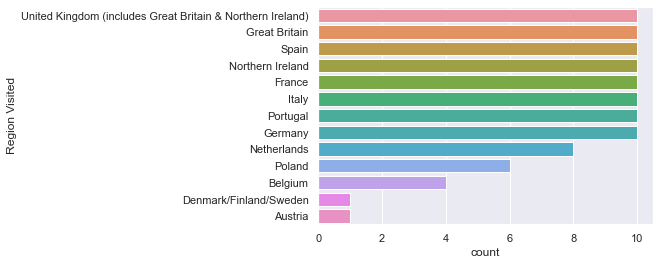

In [23]:
sns.countplot(y='Region Visited', data=datauno.iloc[0:100])  

We've seen that several UK regions are counted separately so I will remove the irrelevant observations and keep the most useful to the exercise:

In [24]:
datauno.drop(datauno.index[(datauno["Region Visited"] == 'Great Britain')],axis=0,inplace=True)

In [25]:
datauno.drop(datauno.index[(datauno["Region Visited"] == 'Northern Ireland')],axis=0,inplace=True)

And I will check the new dimensions of the dataset:

In [26]:
datauno.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 122 to 105
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            80 non-null     int64 
 1   Region Visited  80 non-null     object
 2   total trips     80 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


Creating the graph again with the accurate data:

<AxesSubplot:xlabel='count', ylabel='Region Visited'>

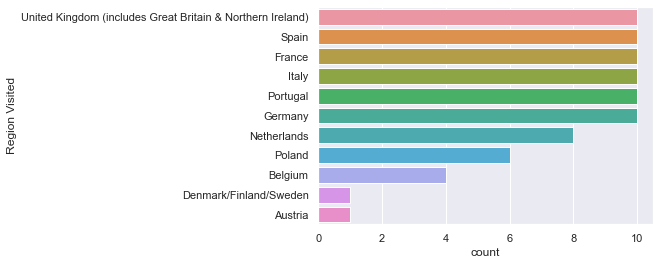

In [27]:
sns.countplot(y='Region Visited', data=datauno.iloc[0:100])  

And now we can visualise the destinations one bar per Region (Country). Based in our graph results we can conclude that the top 3 destinations are UK, Spain and France.

Next I will encode the countries variable so they can be included in the following calculations and visualisations.

Checking the currentl unique values:

In [28]:
print(datauno['Region Visited'].unique())

['United Kingdom (includes Great Britain & Northern Ireland)' 'Spain'
 'France' 'Italy' 'Portugal' 'Germany' 'Netherlands' 'Poland' 'Belgium'
 'Denmark/Finland/Sweden' 'Austria']


Using LabelEncoder from sklearn:

In [29]:
from sklearn.preprocessing import LabelEncoder
Region_Visited= LabelEncoder()
datauno['Region Visited'] = Region_Visited.fit_transform(datauno['Region Visited'])

Checking the encoding is in place:

In [30]:
print(datauno['Region Visited'].unique())

[10  9  3  5  8  4  6  7  1  2  0]


I want to predict the number of trips that there will be done on the top 3 Regions in the year 2025 because then I can start setting the goals based on the demand that we will predict.

The variable 'Total Trips' is a continous numerical feature, so I will train a regressor algorithm to work on this analysis. I want to check if the data has certain pattern or correlations before choosing the Regression method so I will create a heat map as follows:

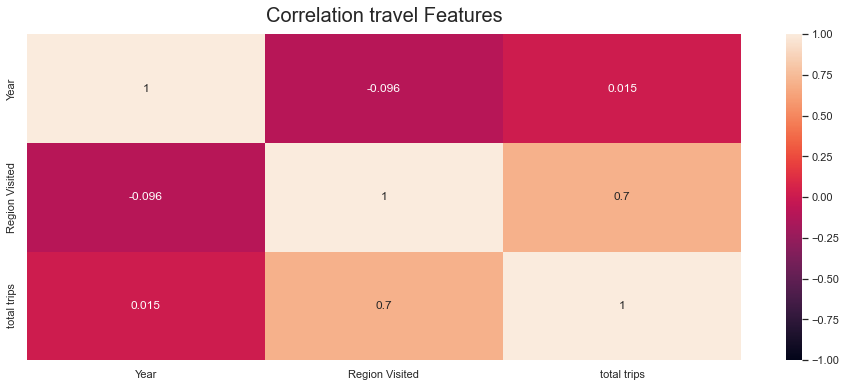

In [31]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(datauno.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation travel Features', fontdict={'fontsize':20}, pad=12);

Having a parameter of 1 for strongly correlated and -1 for unrelated we can see that the only two variables seem to have certain level of relation ship is No. trips and Region. 

##### Training the KNN regressor model:

In [32]:
X = datauno.iloc[:, :-1].values
y = datauno.iloc[:, -1].values

In [33]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
#print(X_train)
#print(y_train)
#print(X_test)
#print(y_test)

In [34]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[-0.95078396  0.63853749]
 [-0.26758591  0.63853749]
 [-1.63398202 -0.49945012]
 [ 1.09881021 -2.01676692]
 [-0.26758591 -0.87877932]
 [-0.60918494  1.01786669]
 [-1.29238299 -0.87877932]
 [-0.60918494 -0.87877932]
 [-1.63398202  1.39719589]
 [-1.63398202 -0.87877932]
 [ 0.75721118  0.25920829]
 [-0.60918494  1.39719589]
 [ 0.41561215  0.63853749]
 [ 0.75721118 -0.12012091]
 [ 0.75721118 -1.25810852]
 [ 1.09881021  1.01786669]
 [ 1.09881021 -0.12012091]
 [-0.95078396 -1.25810852]
 [ 1.44040924  1.01786669]
 [ 1.44040924  0.63853749]
 [-0.95078396 -0.49945012]
 [ 1.44040924  0.25920829]
 [ 1.09881021  1.39719589]
 [-1.29238299 -1.25810852]
 [-0.95078396  0.25920829]
 [ 0.07401312  1.01786669]
 [ 0.41561215 -0.87877932]
 [-0.26758591  1.01786669]
 [-0.60918494 -1.25810852]
 [-0.26758591 -0.49945012]
 [ 0.41561215 -1.25810852]
 [ 0.75721118 -0.49945012]
 [-0.95078396  1.01786669]
 [ 1.44040924  1.39719589]
 [-1.63398202 -0.12012091]
 [-1.29238299  1.01786669]
 [-0.26758591  1.39719589]
 

In [35]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors = 5, metric = 'minkowski', p = 2)
regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [36]:
# Predicting a new result for UK
print(regressor.predict(sc.transform([[2025, 10]])))

[1672.2]


In [37]:
# Predicting a new result for Spain 
print(regressor.predict(sc.transform([[2025, 9]])))

[1167.6]


In [38]:
# Predicting a new result for France
print(regressor.predict(sc.transform([[2025, 3]])))

[386.2]


Now we now how many trips we could expect to take place in 2025 to the top Three Destinations (10 - UK, 9 - Spain and 3 France)

In [39]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 246.6  267. ]
 [ 351.   586. ]
 [ 870.8  526. ]
 [ 297.4   96. ]
 [ 712.8  333. ]
 [ 407.   114. ]
 [ 238.6  136. ]
 [ 385.2  125. ]
 [ 224.8  284. ]
 [ 204.   120. ]
 [ 297.   362. ]
 [ 365.6  163. ]
 [2025.6 2597. ]
 [ 260.2  113. ]
 [ 418.6  261. ]
 [ 292.4  448. ]
 [1978.8 2463. ]
 [ 362.6  632. ]
 [1740.  2304. ]
 [ 366.2  590. ]]


In [40]:
print('The precision of the model is ')
print(regressor.score(X_train, y_train))


The precision of the model is 
0.8917920982043233


### Second dataset

The next dataset is going to provide information about the Number of travels made by Air and by Sea per year. And we want to be able to predict what number of trips will there by by both transportation methods on 2025.


The process of EDA and Data Cleaning will be done as per previous dataset.   


In [41]:
datados = pd.read_csv('TRBA1.20220403T120445.csv')

In [42]:
datados.head()

,Statistic,Year,Passenger Direction,Travel Mode,UNIT,VALUE
0,International Movement of Passengers,1993,Departing Eire,Air,Number,3569016
1,International Movement of Passengers,1993,Departing Eire,Sea,Number,1909188
2,International Movement of Passengers,1994,Departing Eire,Air,Number,4169901
3,International Movement of Passengers,1994,Departing Eire,Sea,Number,1998442
4,International Movement of Passengers,1995,Departing Eire,Air,Number,4823842


In [43]:
datados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Statistic            40 non-null     object
 1   Year                 40 non-null     int64 
 2   Passenger Direction  40 non-null     object
 3   Travel Mode          40 non-null     object
 4   UNIT                 40 non-null     object
 5   VALUE                40 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 2.0+ KB


In [44]:
duplicate_rows_datados = datados[datados.duplicated()]
print("number of duplicate rows:", duplicate_rows_datados.shape)

number of duplicate rows: (0, 6)


There are no duplicates in our observations

In [45]:
print(datados.isnull().sum())

Statistic              0
Year                   0
Passenger Direction    0
Travel Mode            0
UNIT                   0
VALUE                  0
dtype: int64


In [46]:
datados = datados.dropna()
datados.count()

Statistic              40
Year                   40
Passenger Direction    40
Travel Mode            40
UNIT                   40
VALUE                  40
dtype: int64

And there are no missing values in the dataset either. I will proceed to check the variables and act according to their relevance in the same manner than for the first dataset:

In [47]:
print(datados['Statistic'].unique())

['International Movement of Passengers']


In [48]:
print(datados['UNIT'].unique())

['Number']


In [49]:
datados = datados.drop(['Statistic', 'Passenger Direction', 'UNIT'], axis=1)

In [50]:
datados.rename(columns={"VALUE":"Total Passengers"} ,inplace=True)

In [51]:
datados.head()

,Year,Travel Mode,Total Passengers
0,1993,Air,3569016
1,1993,Sea,1909188
2,1994,Air,4169901
3,1994,Sea,1998442
4,1995,Air,4823842


In [52]:
datados.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              40 non-null     int64 
 1   Travel Mode       40 non-null     object
 2   Total Passengers  40 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [53]:
datados = datados.nlargest(n=100, columns=['Total Passengers'])

In [54]:
datados.head()

,Year,Travel Mode,Total Passengers
30,2008,Air,14659971
28,2007,Air,14584234
32,2009,Air,12874667
26,2006,Air,12812284
38,2012,Air,11839699


In [55]:
datados.shape

(40, 3)

##### Visualisation

<AxesSubplot:xlabel='count', ylabel='Travel Mode'>

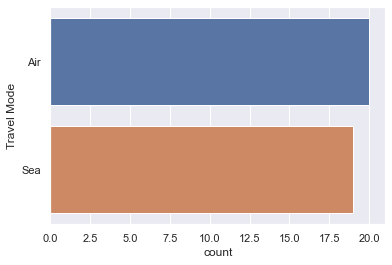

In [56]:
sns.countplot(y='Travel Mode', data=datados.iloc[:-1])  

In [57]:
print(datados['Travel Mode'].unique())

['Air' 'Sea']


In [58]:
from sklearn.preprocessing import LabelEncoder
Travel_Mode= LabelEncoder()
datados['Travel Mode'] = Travel_Mode.fit_transform(datados['Travel Mode'])

In [59]:
print(datados['Travel Mode'].unique())

[0 1]


,Year,Travel Mode,Total Passengers
Year,1.000000e+00,-2.458314e-14,0.313534
Travel Mode,-2.458314e-14,1.000000e+00,-0.844216
Total Passengers,3.135340e-01,-8.442156e-01,1.000000


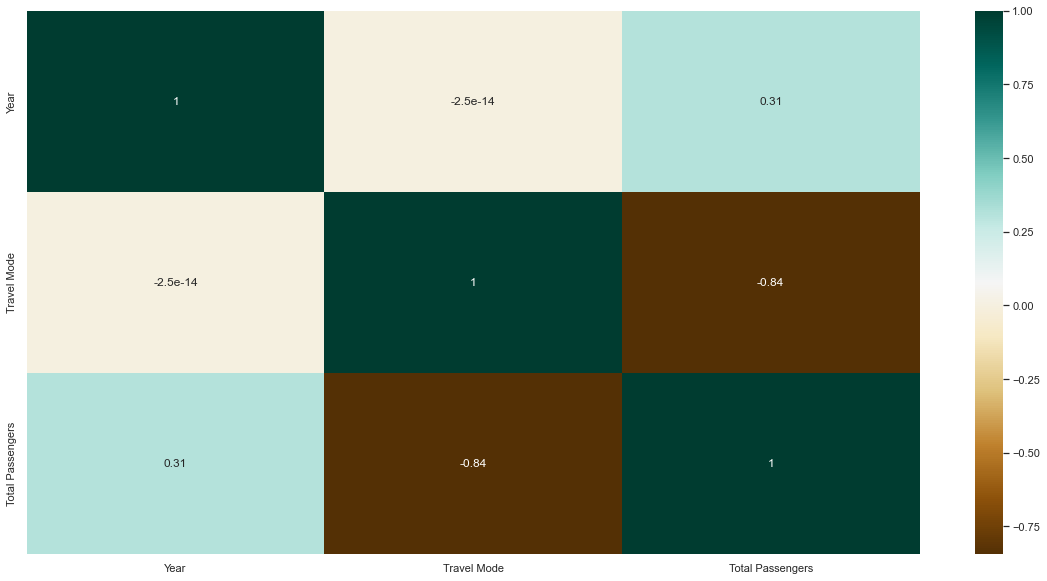

In [60]:
plt.figure(figsize=(20,10))
c= datados.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

There seem to be no correlation whatsoever between variables. This is already useful for us to choose the right model to make our predictions regarding the number of passengers expected in 2025 in both travelling methods.

In [61]:
datados.head()

,Year,Travel Mode,Total Passengers
30,2008,0,14659971
28,2007,0,14584234
32,2009,0,12874667
26,2006,0,12812284
38,2012,0,11839699


##### Training the Decision Tree Regressor:

In [62]:
X = datados.iloc[:,0:-1].values
y = datados.iloc[:, -1].values

In [63]:
# Training the Decision Tree Regression model on the whole dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [64]:
# Predicting a new result
regressor.predict([[2025, 0]])

array([11839699.])

In [65]:
# Predicting a new result
regressor.predict([[2025, 1]])

array([1321876.])

### Third Dataset

The last dataset I'm going to use will provide data about the amount of money spend by passengers only in tickets (fare Expenditure). 

We will make predictions based on how much can we expect to be the Fare Expenditure by 2025 so we can make conclusions regarding the market behave. 

If the market has a solid trend we can use all the previous information and issue investments recomendations to the business, but if the prediction regarding travelling expenditure is not promising we might want to evaluate different ways to increase the profit in the company.

The EDA and Data Cleaning method will be the same as per previous datasets.

In [66]:
datacuatro = pd.read_csv('TMA11.20220403T120409.csv')

In [67]:
datacuatro.head()

,Statistic,Year,Type of Expenditure,UNIT,VALUE
0,Estimated Expenditure by Irish Residents on Ov...,2009,Fare payments by Irish residents abroad to Iri...,Euro Million,570
1,Estimated Expenditure by Irish Residents on Ov...,2010,Fare payments by Irish residents abroad to Iri...,Euro Million,590
2,Estimated Expenditure by Irish Residents on Ov...,2011,Fare payments by Irish residents abroad to Iri...,Euro Million,789
3,Estimated Expenditure by Irish Residents on Ov...,2012,Fare payments by Irish residents abroad to Iri...,Euro Million,821
4,Estimated Expenditure by Irish Residents on Ov...,2013,Fare payments by Irish residents abroad to Iri...,Euro Million,969


In [68]:
datacuatro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Statistic            11 non-null     object
 1   Year                 11 non-null     int64 
 2   Type of Expenditure  11 non-null     object
 3   UNIT                 11 non-null     object
 4   VALUE                11 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 568.0+ bytes


In [69]:
duplicate_rows_datacuatro = datacuatro[datacuatro.duplicated()]
print("number of duplicate rows:", duplicate_rows_datacuatro.shape)

number of duplicate rows: (0, 5)


No Duplicates in our third dataset

In [70]:
print(datacuatro.isnull().sum())

Statistic              0
Year                   0
Type of Expenditure    0
UNIT                   0
VALUE                  0
dtype: int64


In [71]:
datacuatro = datacuatro.dropna()
datacuatro.count()

Statistic              11
Year                   11
Type of Expenditure    11
UNIT                   11
VALUE                  11
dtype: int64

No missing values in our dataset either.

In [72]:
print(datacuatro['Statistic'].unique())

['Estimated Expenditure by Irish Residents on Overseas Trips']


In [73]:
print(datacuatro['Type of Expenditure'].unique())

['Fare payments by Irish residents abroad to Irish carriers']


In [74]:
print(datacuatro['UNIT'].unique())

['Euro Million']


In [75]:
datacuatro = datacuatro.drop(['Statistic', 'Type of Expenditure', 'UNIT'], axis=1)

In [76]:
datacuatro.rename(columns={"VALUE":"Fare Expenditure"} ,inplace=True)

In [77]:
datacuatro.head()

,Year,Fare Expenditure
0,2009,570
1,2010,590
2,2011,789
3,2012,821
4,2013,969


In [78]:
datacuatro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Year              11 non-null     int64
 1   Fare Expenditure  11 non-null     int64
dtypes: int64(2)
memory usage: 264.0 bytes


In [79]:
datacuatro = datacuatro.nlargest(n=100, columns=['Fare Expenditure'])

In [80]:
datacuatro.head()

,Year,Fare Expenditure
10,2019,1435
9,2018,1423
8,2017,1377
7,2016,1247
6,2015,1148


In [81]:
datacuatro.shape

(11, 2)

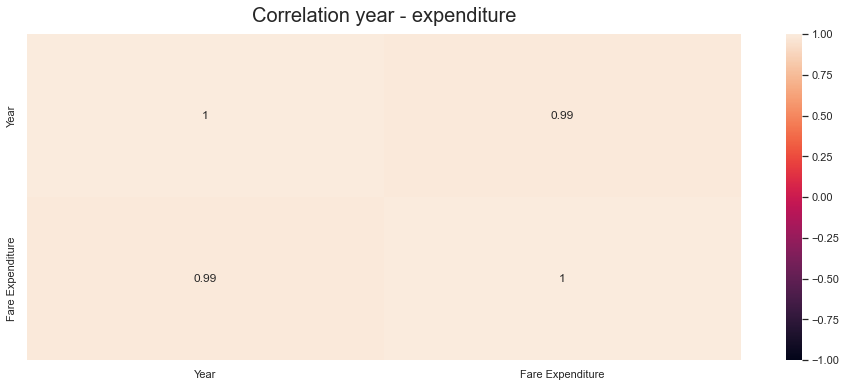

In [82]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(datacuatro.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation year - expenditure', fontdict={'fontsize':20}, pad=12);

We can see there is 0.9 out of 1 in correlation this data has a pattern so we will choose a regressor to predict our continuous variable and supervised learning method because our data is labeled

##### Visualising the relation in a clearer manner by creating a plot:

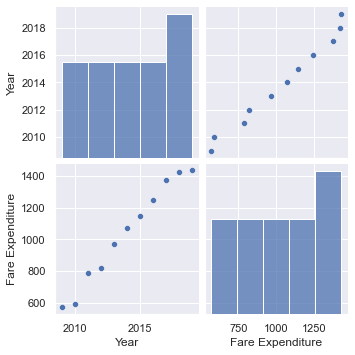

In [83]:
sns.pairplot(datacuatro)

I will use a SVM Rregressor algorithm again and then visualise our results:

In [84]:
X = datacuatro.iloc[:, [0]].values
y = datacuatro.iloc[:, -1].values
print(X)
print(y)

[[2019]
 [2018]
 [2017]
 [2016]
 [2015]
 [2014]
 [2013]
 [2012]
 [2011]
 [2010]
 [2009]]
[1435 1423 1377 1247 1148 1074  969  821  789  590  570]


In [85]:
# we need to reshape 'y' bc is not a list but an array

y = y.reshape(len(y),1)
print(y)

[[1435]
 [1423]
 [1377]
 [1247]
 [1148]
 [1074]
 [ 969]
 [ 821]
 [ 789]
 [ 590]
 [ 570]]


In [86]:
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [87]:
print(X)


[[ 1.58113883]
 [ 1.26491106]
 [ 0.9486833 ]
 [ 0.63245553]
 [ 0.31622777]
 [ 0.        ]
 [-0.31622777]
 [-0.63245553]
 [-0.9486833 ]
 [-1.26491106]
 [-1.58113883]]


In [88]:
print(y)

[[ 1.30179272]
 [ 1.26221726]
 [ 1.11051134]
 [ 0.68177721]
 [ 0.35527968]
 [ 0.11123102]
 [-0.23505424]
 [-0.72315155]
 [-0.82868611]
 [-1.48497912]
 [-1.55093822]]


In [89]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [90]:
# Predicting the expenditure for 2025:

sc_y.inverse_transform(regressor.predict(sc_X.transform([[2025]])))

array([1028.91515954])

Text(0, 0.5, 'Total Fare Expenditure')

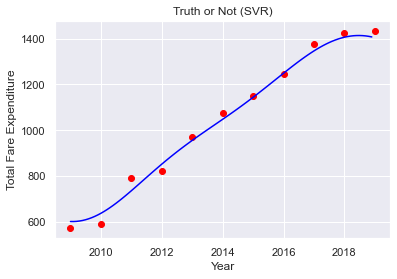

In [91]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Truth or Not (SVR)')
plt.xlabel('Year')
plt.ylabel('Total Fare Expenditure')

Based in the results obtained by 2025 the Fare Expecditure will likely be around 1028 euromillion

Per graph we can conclude that the trend is solid and positive in terms of travelling money spent in fare so we can conclude based on this analysis that investing on expansion would be a good idea.

I will include a comprehensive analysis of the step by step performed in our datasets, the reasoning for the conclusions and business recommendations.